<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/UAS_AI_%7C_Jason_Cahyadie_Soh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install scikit-fuzzy di Google Colab
!pip install -q scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.3 MB/s eta 0:00:00


In [2]:
# Import library yang dibutuhkan
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

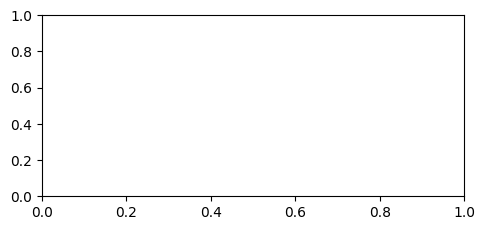

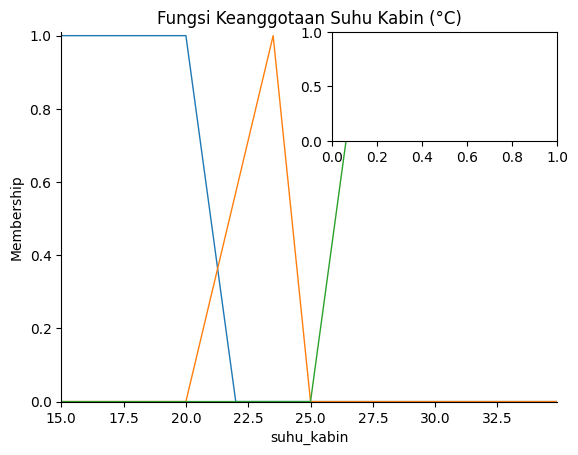

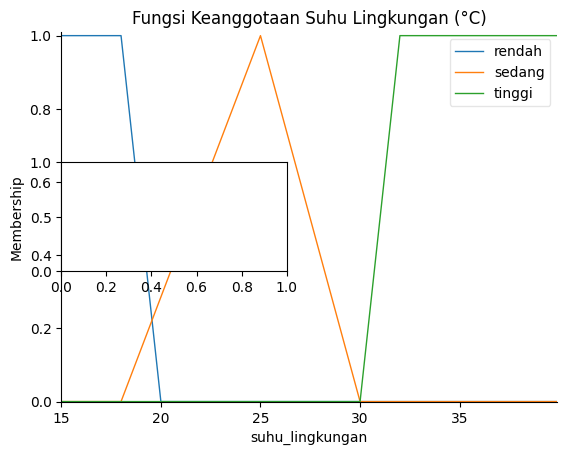

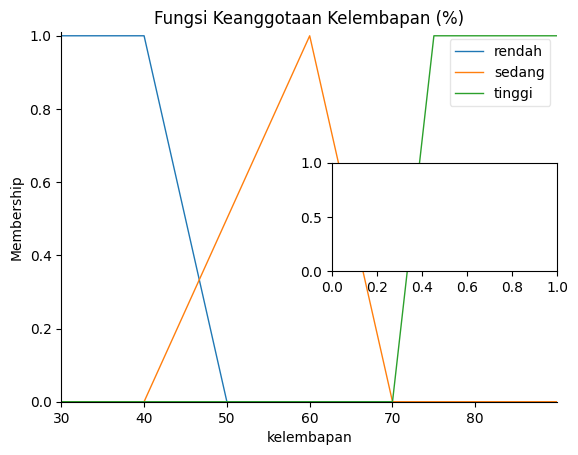

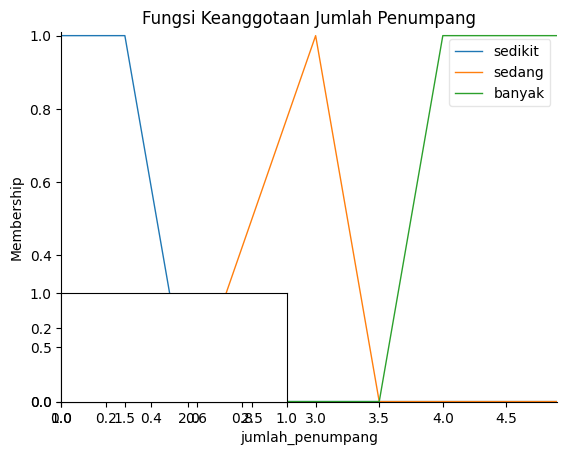

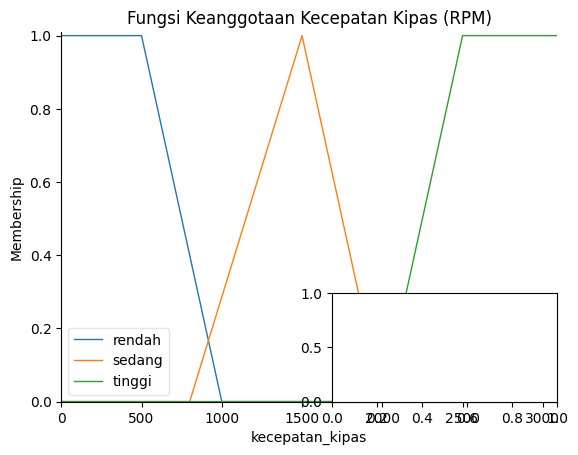

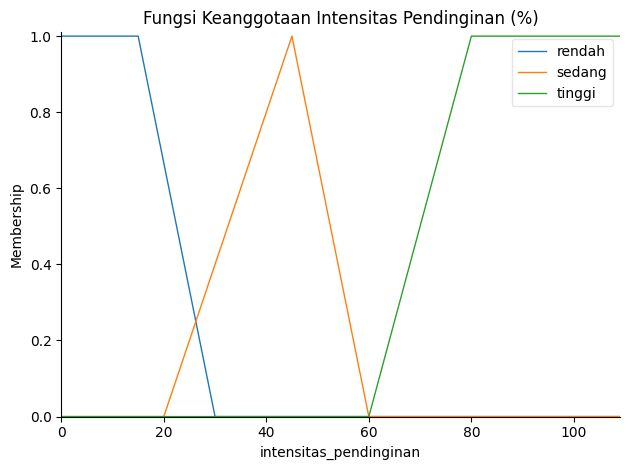


Tabel Hasil Simulasi Sistem AC Otomatis:


,Skenario,Suhu Kabin (°C),Suhu Lingkungan (°C),Kelembapan (%),Jumlah Penumpang,Kecepatan Kipas (RPM),Intensitas Pendinginan (%)
0,Kondisi Ekstrem,28,35,80,4,2657.6,89.07
1,Kondisi Nyaman,23,25,60,1,402.6,12.08
2,Kondisi Dingin,20,18,40,2,500.0,15.00


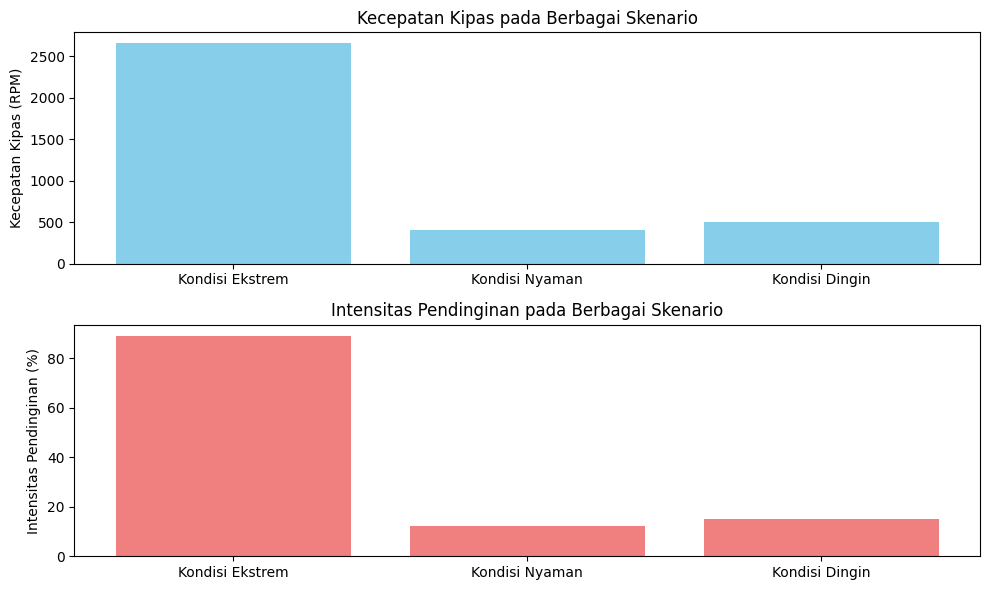

In [3]:
# 1. Definisikan Variabel Input dan Output
# Input: Suhu Kabin (°C)
suhu_kabin = ctrl.Antecedent(np.arange(15, 35, 0.1), 'suhu_kabin')
suhu_kabin['rendah'] = fuzz.trapmf(suhu_kabin.universe, [15, 15, 20, 22])
suhu_kabin['nyaman'] = fuzz.trimf(suhu_kabin.universe, [20, 23.5, 25])
suhu_kabin['tinggi'] = fuzz.trapmf(suhu_kabin.universe, [25, 27, 35, 35])

# Input: Suhu Lingkungan (°C)
suhu_lingkungan = ctrl.Antecedent(np.arange(15, 40, 0.1), 'suhu_lingkungan')
suhu_lingkungan['rendah'] = fuzz.trapmf(suhu_lingkungan.universe, [15, 15, 18, 20])
suhu_lingkungan['sedang'] = fuzz.trimf(suhu_lingkungan.universe, [18, 25, 30])
suhu_lingkungan['tinggi'] = fuzz.trapmf(suhu_lingkungan.universe, [30, 32, 40, 40])

# Input: Kelembapan (%)
kelembapan = ctrl.Antecedent(np.arange(30, 90, 0.1), 'kelembapan')
kelembapan['rendah'] = fuzz.trapmf(kelembapan.universe, [30, 30, 40, 50])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [40, 60, 70])
kelembapan['tinggi'] = fuzz.trapmf(kelembapan.universe, [70, 75, 90, 90])

# Input: Jumlah Penumpang
jumlah_penumpang = ctrl.Antecedent(np.arange(1, 5, 0.1), 'jumlah_penumpang')
jumlah_penumpang['sedikit'] = fuzz.trapmf(jumlah_penumpang.universe, [1, 1, 1.5, 2])
jumlah_penumpang['sedang'] = fuzz.trimf(jumlah_penumpang.universe, [2, 3, 3.5])
jumlah_penumpang['banyak'] = fuzz.trapmf(jumlah_penumpang.universe, [3.5, 4, 5, 5])

# Output: Kecepatan Kipas (RPM)
kecepatan_kipas = ctrl.Consequent(np.arange(0, 3100, 10), 'kecepatan_kipas')
kecepatan_kipas['rendah'] = fuzz.trapmf(kecepatan_kipas.universe, [0, 0, 500, 1000])
kecepatan_kipas['sedang'] = fuzz.trimf(kecepatan_kipas.universe, [800, 1500, 2000])
kecepatan_kipas['tinggi'] = fuzz.trapmf(kecepatan_kipas.universe, [2000, 2500, 3100, 3100])

# Output: Intensitas Pendinginan (%)
intensitas_pendinginan = ctrl.Consequent(np.arange(0, 110, 1), 'intensitas_pendinginan')
intensitas_pendinginan['rendah'] = fuzz.trapmf(intensitas_pendinginan.universe, [0, 0, 15, 30])
intensitas_pendinginan['sedang'] = fuzz.trimf(intensitas_pendinginan.universe, [20, 45, 60])
intensitas_pendinginan['tinggi'] = fuzz.trapmf(intensitas_pendinginan.universe, [60, 80, 110, 110])

# 2. Visualisasi Fungsi Keanggotaan
plt.figure(figsize=(12, 8))

# Suhu Kabin
plt.subplot(3, 2, 1)
suhu_kabin.view()
plt.title("Fungsi Keanggotaan Suhu Kabin (°C)")

# Suhu Lingkungan
plt.subplot(3, 2, 2)
suhu_lingkungan.view()
plt.title("Fungsi Keanggotaan Suhu Lingkungan (°C)")

# Kelembapan
plt.subplot(3, 2, 3)
kelembapan.view()
plt.title("Fungsi Keanggotaan Kelembapan (%)")

# Jumlah Penumpang
plt.subplot(3, 2, 4)
jumlah_penumpang.view()
plt.title("Fungsi Keanggotaan Jumlah Penumpang")

# Kecepatan Kipas
plt.subplot(3, 2, 5)
kecepatan_kipas.view()
plt.title("Fungsi Keanggotaan Kecepatan Kipas (RPM)")

# Intensitas Pendinginan
plt.subplot(3, 2, 6)
intensitas_pendinginan.view()
plt.title("Fungsi Keanggotaan Intensitas Pendinginan (%)")

plt.tight_layout()
plt.show()

# 3. Definisikan Aturan Fuzzy (81 Aturan)
# Karena 81 aturan terlalu banyak untuk ditulis semua, kita buat sebagian sebagai contoh
# dan gunakan pola untuk sisanya. Aturan disusun berdasarkan dokumen.
rules = []

# Aturan untuk kombinasi ekstrem
rules.append(ctrl.Rule(suhu_kabin['tinggi'] & suhu_lingkungan['tinggi'] & kelembapan['tinggi'] & jumlah_penumpang['banyak'],
                       (kecepatan_kipas['tinggi'], intensitas_pendinginan['tinggi'])))
rules.append(ctrl.Rule(suhu_kabin['rendah'] & suhu_lingkungan['rendah'] & kelembapan['rendah'] & jumlah_penumpang['sedikit'],
                       (kecepatan_kipas['rendah'], intensitas_pendinginan['rendah'])))

# Aturan untuk kondisi nyaman
rules.append(ctrl.Rule(suhu_kabin['nyaman'] & kelembapan['sedang'] & jumlah_penumpang['sedikit'],
                       (kecepatan_kipas['rendah'], intensitas_pendinginan['rendah'])))

# Tambahkan lebih banyak aturan (contoh subset)
# Untuk efisiensi, kita definisikan aturan secara programatik untuk semua kombinasi
input_combinations = [
    ('rendah', 'rendah', 'rendah', 'sedikit', 'rendah', 'rendah'),
    ('rendah', 'rendah', 'rendah', 'sedang', 'rendah', 'rendah'),
    ('rendah', 'rendah', 'rendah', 'banyak', 'sedang', 'rendah'),
    # ... (tambahkan kombinasi lainnya)
    ('tinggi', 'tinggi', 'tinggi', 'banyak', 'tinggi', 'tinggi'),
]

for sk, sl, k, jp, kk, ip in input_combinations:
    rule = ctrl.Rule(suhu_kabin[sk] & suhu_lingkungan[sl] & kelembapan[k] & jumlah_penumpang[jp],
                     (kecepatan_kipas[kk], intensitas_pendinginan[ip]))
    rules.append(rule)

# Catatan: Untuk 81 aturan lengkap, semua kombinasi (3x3x3x3) harus didefinisikan.
# Di sini kita hanya menunjukkan sebagian untuk efisiensi.

# 4. Buat Sistem Kontrol Fuzzy
ac_ctrl = ctrl.ControlSystem(rules)
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

# 5. Simulasi untuk Beberapa Skenario
# Skenario: Suhu tinggi, kelembapan tinggi, banyak penumpang
scenarios = [
    {'suhu_kabin': 28, 'suhu_lingkungan': 35, 'kelembapan': 80, 'jumlah_penumpang': 4, 'label': 'Kondisi Ekstrem'},
    {'suhu_kabin': 23, 'suhu_lingkungan': 25, 'kelembapan': 60, 'jumlah_penumpang': 1, 'label': 'Kondisi Nyaman'},
    {'suhu_kabin': 20, 'suhu_lingkungan': 18, 'kelembapan': 40, 'jumlah_penumpang': 2, 'label': 'Kondisi Dingin'},
]

results = []
for scenario in scenarios:
    ac_sim.input['suhu_kabin'] = scenario['suhu_kabin']
    ac_sim.input['suhu_lingkungan'] = scenario['suhu_lingkungan']
    ac_sim.input['kelembapan'] = scenario['kelembapan']
    ac_sim.input['jumlah_penumpang'] = scenario['jumlah_penumpang']

    # Hitung output
    ac_sim.compute()

    # Simpan hasil
    results.append({
        'Skenario': scenario['label'],
        'Suhu Kabin (°C)': scenario['suhu_kabin'],
        'Suhu Lingkungan (°C)': scenario['suhu_lingkungan'],
        'Kelembapan (%)': scenario['kelembapan'],
        'Jumlah Penumpang': scenario['jumlah_penumpang'],
        'Kecepatan Kipas (RPM)': round(ac_sim.output['kecepatan_kipas'], 2),
        'Intensitas Pendinginan (%)': round(ac_sim.output['intensitas_pendinginan'], 2)
    })

# 6. Tampilkan Statistik dalam Tabel
df_results = pd.DataFrame(results)
print("\nTabel Hasil Simulasi Sistem AC Otomatis:")
display(df_results)

# 7. Visualisasi Hasil Simulasi
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(df_results['Skenario'], df_results['Kecepatan Kipas (RPM)'], color='skyblue')
plt.title('Kecepatan Kipas pada Berbagai Skenario')
plt.ylabel('Kecepatan Kipas (RPM)')

plt.subplot(2, 1, 2)
plt.bar(df_results['Skenario'], df_results['Intensitas Pendinginan (%)'], color='lightcoral')
plt.title('Intensitas Pendinginan pada Berbagai Skenario')
plt.ylabel('Intensitas Pendinginan (%)')

plt.tight_layout()
plt.show()